In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-100list-of-bestselling-mobile-phones/List of best-selling mobile phones.csv


In [2]:
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [3]:
phonedata = pd.read_csv("../input/top-100list-of-bestselling-mobile-phones/List of best-selling mobile phones.csv")


In [4]:
phonedata.dtypes

Rank             float64
Manufacturer      object
Model             object
Form factor       object
Smartphone?       object
Year               int64
Million Units     object
dtype: object

In [5]:
phonedata.head()

,Rank,Manufacturer,Model,Form factor,Smartphone?,Year,Million Units
0,1.0,Nokia,1100,Bar,No,2003,250[4][1][5]
1,2.0,Nokia,1110,Bar,No,2005,247.5[4][1][6]
2,3.0,Apple,iPhone 6 and iPhone 6 Plus,Touchscreen,Yes,2014,224[7]
3,4.0,Nokia,"105 (2013), 105 (2015)",Bar,No,2013,200[8]
4,5.0,Apple,iPhone 6S and iPhone 6S Plus,Touchscreen,Yes,2015,174.1[9][10][11][12]


#### how many column and rows we have?

In [6]:
phonedata.shape

(115, 7)

## Group the data by phone names of each mark or manufacturer

In [7]:
phonedata['Manufacturer'].nunique()

14

## so now let's analyze every mark and it's best selling phones and how much units they sold.

In [8]:
# Group the phonedata DataFrame by 'Manufacturer'
group_phones = phonedata.groupby('Manufacturer')

# Iterate over the groups
for manufacturer, group in group_phones:
    # Perform operations on each group
    print("Manufacturer:", manufacturer)
    print(group)
    print()

Manufacturer: Apple
      Rank Manufacturer                                              Model  \
2      3.0        Apple                         iPhone 6 and iPhone 6 Plus   
4      5.0        Apple                       iPhone 6S and iPhone 6S Plus   
5      6.0        Apple                                          iPhone 5S   
7      8.0        Apple                         iPhone 7 and iPhone 7 Plus   
8      9.0        Apple     iPhone 11, iPhone 11 Pro and iPhone 11 Pro Max   
9     10.0        Apple             iPhone XR, iPhone XS and iPhone XS Max   
14    15.0        Apple                                           iPhone 5   
19    20.0        Apple                         iPhone 8 and iPhone 8 Plus   
20    21.0        Apple  Apple iPhone 12, iPhone 12 mini, iPhone 12 Pro...   
27    28.0        Apple                                           iPhone X   
28    29.0        Apple                                          iPhone 4S   
35    36.0        Apple                     

## how much every mark have sold in total

#### Group the phonedata DataFrame by 'Manufacturer' with 'million unit' column

In [9]:
unit_by_manufacturer = phonedata.groupby('Manufacturer')['Million Units'].sum()

print(unit_by_manufacturer)

Manufacturer
Apple                       224[7]174.1[9][10][11][12]164.5[7]159.9[11][14...
Google                                                                2.1[81]
HTC                                                                    16[30]
Huawei                             32[36][19]20[49]17[50]17[49]15.8[50]12[54]
LG                          30[37]21[43][44][45][46]13[52][53]10[59]10[65]...
LeTV                                                                3[79][80]
Motorola                                   130[4][6]60[4][6]60[6]60[30]13[30]
Nokia                       250[4][1][5]247.5[4][1][6]200[8]161[1][6][13]1...
Oppo                                                             9.7[69]7[72]
Palm                                                                    2[82]
Research In Motion (RIM)                                               15[30]
Samsung                     150[4]70[27]70[28]55[31]45[33]41[34]40[6]37[35...
Sony Ericsson                                      

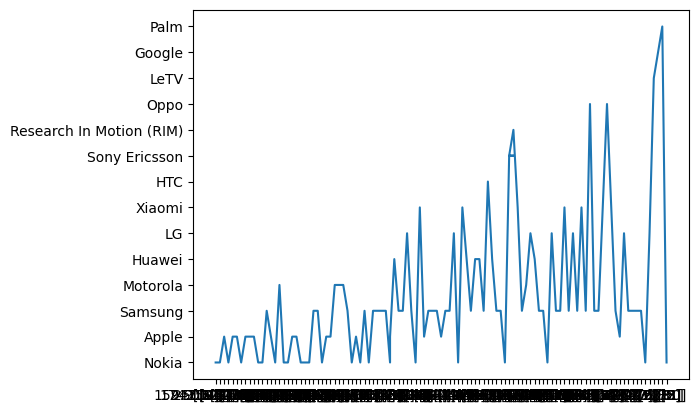

In [10]:
plt.plot(phonedata["Million Units"], phonedata["Manufacturer"],)
plt.show()

## lets see how many phone models each year have sold for each Models.

In [11]:
# Group the phonedata DataFrame by 'Year','Million Units' and 'Model'
unit_sold_by_year = phonedata.groupby('Year')[['Million Units', 'Model']].sum()

print(unit_sold_by_year)

                                          Million Units  \
Year                                                      
1996                                           60[4][6]   
1999                                      161[1][6][13]   
2000                                   126[4][1][6][22]   
2003  250[4][1][5]150[4][1]60[6]50[6]20[47][13]10[57...   
2004  135[4][1][6][5]130[4][6]75[4][6][5]50[6]35[6]1...   
2005  247.5[4][1][6]130[4][1][6][5]60[30]45[30][5]15...   
2006  47[32]30[30]30[5]21[43][44][45][46]15[30][51]1...   
2007  150[4][1][6]100[4][1][6]65[4][6]15[5]10[58]6[7...   
2008                             30[37]15[5]15[5]10[59]   
2009        150[4][1][6]150[4]35[6]13[52][53]10[60]2[5]   
2010                                100[26]50[30]25[41]   
2011            60[4][6][30]40[6]16[30]13[30]10[61][62]   
2012                         146.2[7]70[27]30[38]10[63]   
2013                200[8]164.5[7]70[28]10[64]3[77][78]   
2014                        224[7]10[65][66][67]4.5[76] 

### as we see it started with Model 'StarTAC' in 1996 and the last is 'Galaxy S22 Ultra' in 2022

<Axes: xlabel='Year', ylabel='Manufacturer'>

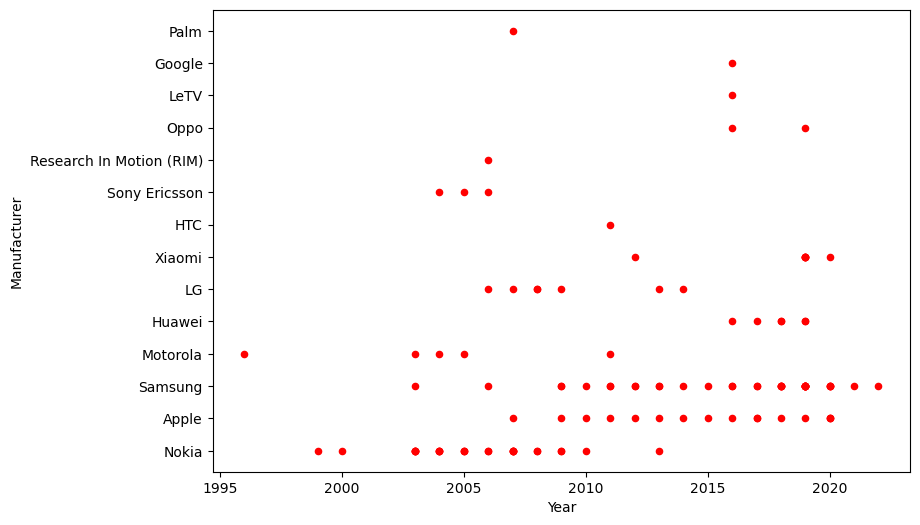

In [12]:
phonedata.plot(kind='scatter',
        y='Manufacturer',
        x='Year',
        color='red', figsize=(9,6))

### lets see which of the years have the most ranking, which let us see when most phones were bought

<Axes: xlabel='Year', ylabel='Rank'>

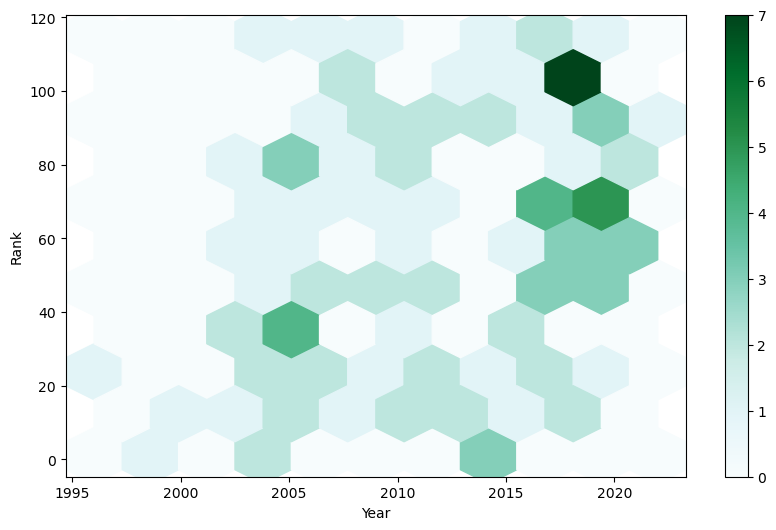

In [13]:
phonedata.plot(kind='hexbin', x='Year', y='Rank', gridsize=10, figsize=(10,6))

<Axes: xlabel='Manufacturer'>

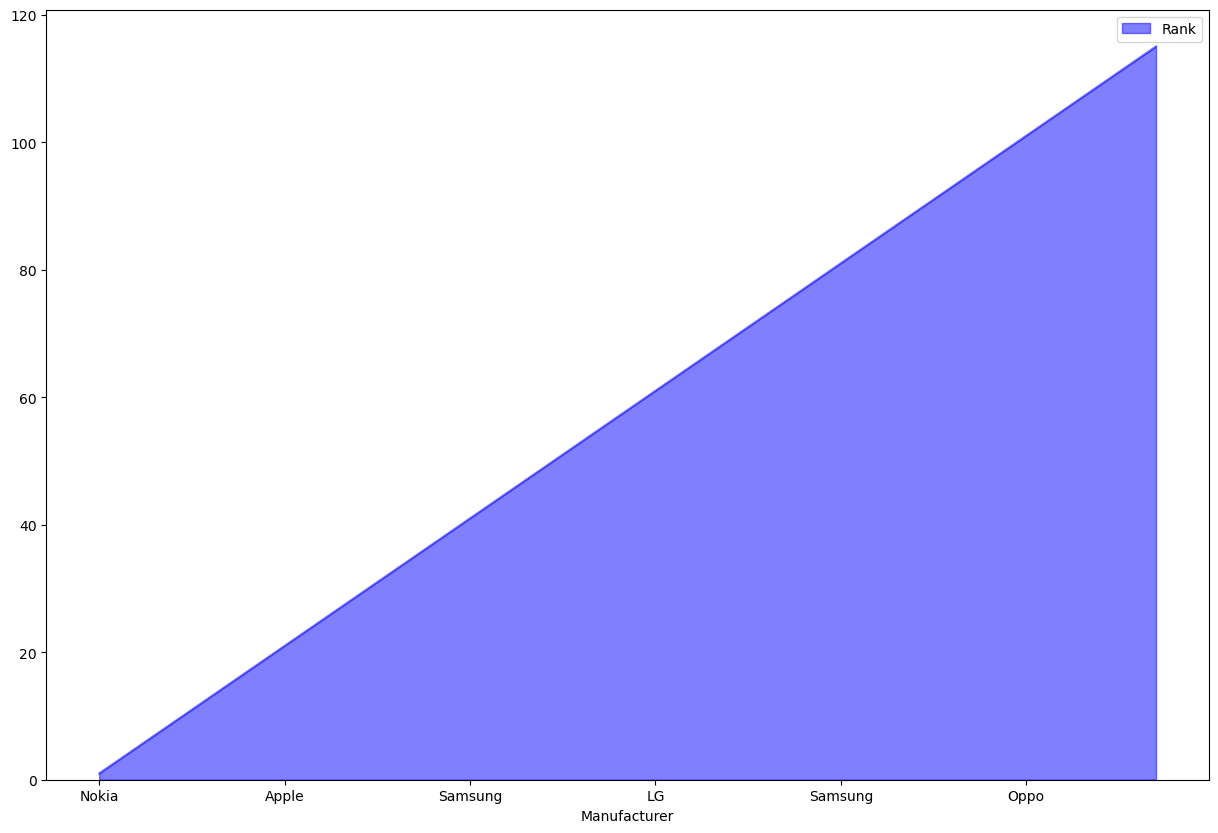

In [14]:
phonedata.plot(kind='area',
       y='Rank',
      x='Manufacturer',
      color='blue',stacked=False, figsize=(15,10))